In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
def cubic_spline(x, y, p): #массив х-координат, массив y-координат, массив весов
    #функция возвращает полиномиальные коэффициенты M,z  сглаживающего кубического сплайна на каждом тнтервале и длину интервала h 
    m = len(x) - 1  #количество интервалов

    R = np.zeros((m + 1, m + 1))
    for i in range(m + 1):
        R[i][i] = 1 / p[i]

    h = np.zeros(m)  #длина интервала [xi,xi+1]
    A = np.zeros((m + 1, m + 1))
    H = np.zeros((m + 1, m + 1))
    for i in range(m):
        h[i] = x[i + 1] - x[i]

    n = np.zeros(m)

    v = np.zeros(m)
    for i in range(m):
        v[i] = 1 / h[i]

    w = np.zeros(m - 1)
    for i in range(m - 1):
        w[i] = 1 / h[i] + 1 / h[i + 1]

    for i in range(2, m - 1):
        A[i][i] = 2 * (h[i - 1] + h[i])
        A[i][i + 1] = h[i]
        A[i][i - 1] = h[i - 1]

    A[0][0] = 1
    A[m][m] = 1
    A[1][1] = 2 * (h[0] + h[1])
    A[1][2] = h[1]
    A[m - 1][m - 1] = 2 * (h[m - 2] + h[m - 1])
    A[m - 2][m - 1] = h[m - 2]

    for i in range(1, m):
        H[i][i - 1] = v[i - 1]
        H[i][i] = -1 * w[i - 1]
        H[i][i + 1] = v[i]

    HT = H.transpose()
    RHT = np.dot(R, HT)
    HRHT = np.dot(H, RHT)
    RES = A + 6 * HRHT
    M = np.linalg.solve(RES, 6 * np.dot(H, y))

    RHTM = np.dot(RHT, M)
    z = y - RHTM
    return [M, z, h]

In [3]:
def get_value_cubic_spline(argument, M,S,X):
    if(argument < X[0] or argument >= X[-1]):
        return
    #вычисляем на каком отрезке находится argument
    i = 0 
    while(argument > X[i]):
        i+=1
        
    #вычисляем значение функции по известной формуле
    h = X[i] - X[i-1]
    t = (argument - X[i-1])/h
    i -=1
    k = S[i] * (1 - t) + S[i + 1] * t - (h**2) / 6 * t * (1 - t) * ((2 - t) * M[i] + (1 + t) * M[i + 1])
    return k

In [4]:
def graph_cubic_spline(M, S, h, x, v=50):
    x_g = []
    y_g = []
    m = len(M) - 1
    for i in range(m):
        t = np.linspace(0, 1, v)
        for j in range(v):
            k = S[i] * (1 - t[j]) + S[i + 1] * t[j] - (h[i]**2) / 6 * t[j] * (
                1 - t[j]) * ((2 - t[j]) * M[i] + (1 + t[j]) * M[i + 1])
            y_g.append(k)
            x_g.append(h[i] * t[j] + x[i])
    
    # Построение графика
    plt.plot(x_g, y_g)  # построение графика

    

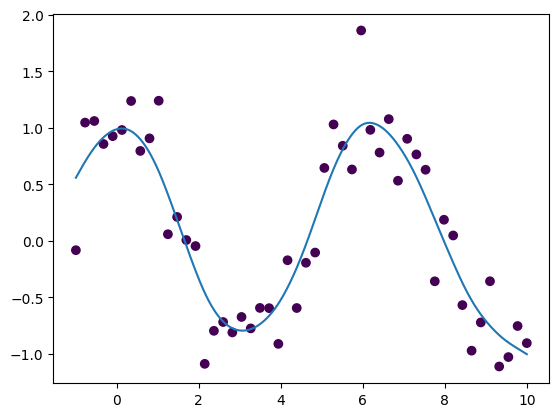

In [5]:
%matplotlib inline

#Генерация данных
def f1(x):
    return math.cos(x)

N = 50 #число точек
X = np.linspace(-1, 10, N)
P = np.ones(N) *3

y = np.zeros(N)
for i in range(N):
    y[i] = f1(X[i])
    
mu = 0 # mean and standard deviation
sigma = (1/P).tolist()
noise = np.random.default_rng().normal(mu, sigma, N)

observation = y+noise


#Использование сглаживающего сплайна
Res = cubic_spline(X, observation, P)
M = Res[0]
S = Res[1]
h = Res[2]

#print(M, '\n', S)
graph_cubic_spline(M, S, h, X, 50)

plt.scatter(X,observation, c = P.tolist())

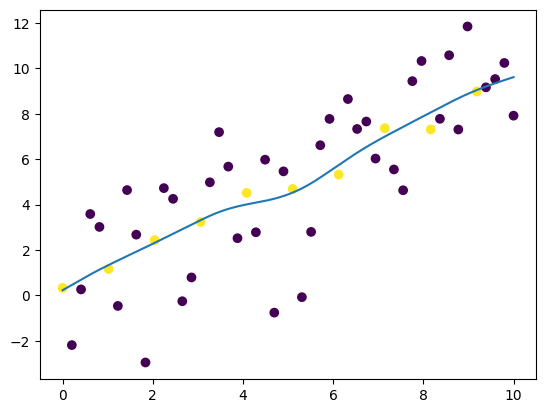

In [6]:
%matplotlib inline

def f2(x):
    return x

N = 50 #число точек
X = np.linspace(0, 10, N) 

P = np.ones(N) * 0.4
P[::5] *= 6 #некоторые точки известны точнее других

y = np.zeros(N)
for i in range(N):
    y[i] = f2(X[i])
    
mu = 0
sigma = (1/P).tolist()  # mean and standard deviation
noise = np.random.default_rng().normal(mu, sigma, N)

observation = y+noise

Res = cubic_spline(X, observation, P)
M = Res[0]
S = Res[1]
h = Res[2]

#print(M, '\n', S)
graph_cubic_spline(M, S, h, X, 50)

plt.scatter(X,observation, c = P.tolist())